In [1]:
!pip install scikit-optimize

In [2]:
# ======================================
# 1. Import Libraries
# ======================================

In [5]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.gaussian_process import GaussianProcessClassifier, GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, ExpSineSquared, DotProduct, ConstantKernel, RationalQuadratic
from scipy.stats import norm
from skopt import gp_minimize
from skopt.space import Real
from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from itertools import product
from skopt.utils import use_named_args
import warnings
warnings.filterwarnings('always')

In [6]:
# ======================================
# 2. Add updated inputs for function-1
# ======================================

In [24]:
inputs3 = np.array([[0.17152521, 0.34391687, 0.2487372 ],
       [0.24211446, 0.64407427, 0.27243281],
       [0.53490572, 0.39850092, 0.17338873],
       [0.49258141, 0.61159319, 0.34017639],
       [0.13462167, 0.21991724, 0.45820622],
       [0.34552327, 0.94135983, 0.26936348],
       [0.15183663, 0.43999062, 0.99088187],
       [0.64550284, 0.39714294, 0.91977134],
       [0.74691195, 0.28419631, 0.22629985],
       [0.17047699, 0.6970324 , 0.14916943],
       [0.22054934, 0.29782524, 0.34355534],
       [0.66601366, 0.67198515, 0.2462953 ],
       [0.04680895, 0.23136024, 0.77061759],
       [0.60009728, 0.72513573, 0.06608864],
       [0.96599485, 0.86111969, 0.56682913],
       [0.000025, 0.000025, 0.000025],
       [0.001200, 0.001200, 0.001200],
       [0.110000, 0.110000, 0.110000],
       [0.000100, 0.000100, 0.000100],
       [0.080000, 0.080000, 0.080000],
       [0.060000, 0.060000, 0.060000],
       [0.006000, 0.006000, 0.006000],
       [0.000050, 0.000050, 0.000050],
       [0.004000, 0.004000, 0.004000],
       [0.003000, 0.003000, 0.003000],
       [0.001000, 0.001000, 0.001000],
       [0.100000, 0.100000, 0.100000]])

X = inputs3

In [25]:
# ======================================
# 2. Add updated outputs for function1
# ======================================

In [26]:
outputs3 = np.array([-0.1121222 , -0.08796286, -0.11141465, -0.03483531, -0.04800758,
       -0.11062091, -0.39892551, -0.11386851, -0.13146061, -0.09418956,
       -0.04694741, -0.10596504, -0.11804826, -0.03637783, -0.05675837, -0.1774117049106864, -0.1916243127436476, -0.11197458458777187,
       -0.1737227467965141, -0.09406751928961186,
       -0.12842585642363258, -0.16023122342316115, -0.18238172162024777, 
       -0.17335108515025427, -0.17178948827128093,-0.1738944500658277, -0.09621113946344366])

y = outputs3

In [27]:
# ======================================
# 4. Plotting input and output on a graph
# ======================================

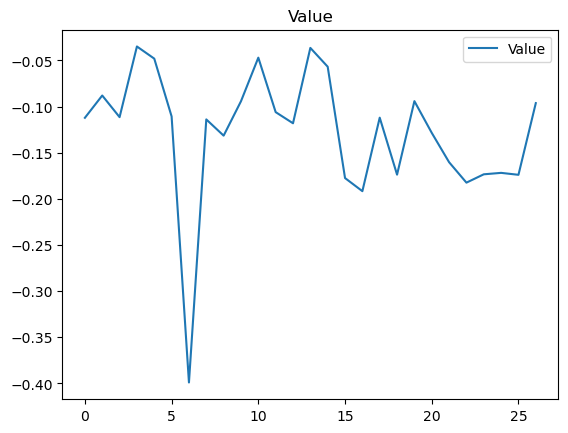

In [28]:
df = pd.DataFrame(outputs3, columns = ['Value'], index = range(outputs3.size))
plot = df.plot(title="Value")

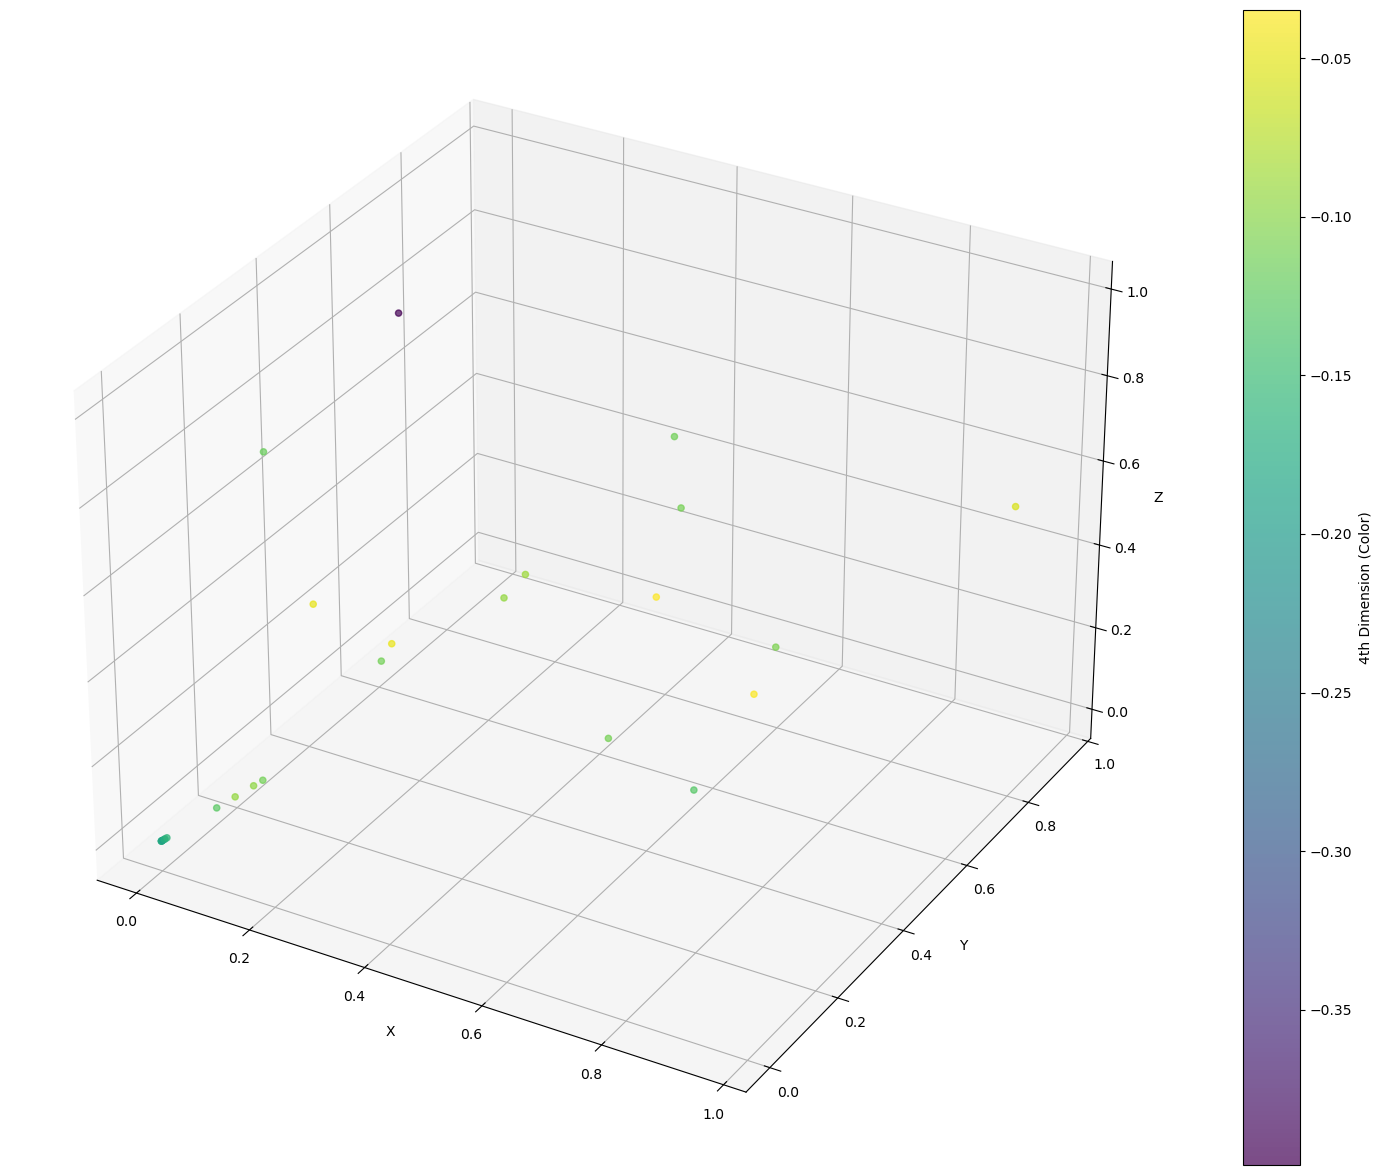

In [29]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', alpha=0.7)

fig.colorbar(sc, label='4th Dimension (Color)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [30]:
# Define the BO search space 
space  = [
    Real(-2.0,  2.0, name="log10_ls1"), #bounds (0.01, 10)
    Real(-2.0,  2.0, name="log10_ls2"), #bounds (0.01, 10)
    Real(-2.0,  2.0, name="log10_ls3"), #bounds (0.01, 10)
    Real(-8.0, -1.0, name="log10_noise"),   # noise in [1e-8, 1e-1]
]

@use_named_args(space)
def objective(log10_ls1, log10_ls2, log10_ls3, log10_noise):
    ls1 = 10.0 ** log10_ls1
    ls2 = 10.0 ** log10_ls2
    ls3 = 10.0 ** log10_ls3
    noise  = 10.0 ** log10_noise
    ls_vec = np.array([ls1, ls2, ls3])

    kernel = RBF(
        length_scale=ls_vec,
        length_scale_bounds="fixed"   # do NOT re-optimise inside
    ) + WhiteKernel(noise_level=noise, noise_level_bounds="fixed")

    gp = GaussianProcessRegressor(
        kernel=kernel,
        alpha=1e-6,
        normalize_y=True,
        optimizer=None                #keep hyperparams fixed
    )

    gp.fit(X, y)
    lml = gp.log_marginal_likelihood()
    
    neg_lml = -lml
    return neg_lml

# Run BO over hyperparameters 
res = gp_minimize(
    func=objective,
    dimensions=space,
    acq_func="EI",       
    n_calls=100,          
    n_initial_points=30, 
)


print("\n========= BO RESULTS =========")
print("Best (log10_ls1, log10_ls2, log10_ls3, log10_noise):", res.x)

best_log10_ls1, best_log10_ls2, best_log10_ls3, best_log10_noise = res.x

best_ls1 = 10.0 ** best_log10_ls1
best_ls2 = 10.0 ** best_log10_ls2
best_ls3 = 10.0 ** best_log10_ls3
best_noise  = 10.0 ** best_log10_noise
best_ls_vec = np.array([best_ls1, best_ls2, best_ls3])

print(f"Best ls_ARD   = [{best_ls1}, {best_ls2}, {best_ls3}]")
print(f"Best noise    = {best_noise}")
print(f"Best LML      = {-res.fun}")


========= BO RESULTS =========
Best (log10_ls1, log10_ls2, log10_ls3, log10_noise): [-0.030051104553171504, -1.747146410218115, 1.5146247203770047, -1.9738165685628974]
Best ls_ARD   = [0.9331444888145145, 0.01790002303175036, 32.70579576181202]
Best noise    = 0.01062144076540593
Best LML      = -23.400326617694198


In [31]:
# Fit Gaussian Process surrogate
kernel3 = RBF(
        length_scale=best_ls_vec,length_scale_bounds='fixed'   # do NOT re-optimise inside
    ) + WhiteKernel(noise_level=best_noise, noise_level_bounds='fixed')

#Initialize Gaussian Process Regressor
gp = GaussianProcessRegressor(
    kernel=kernel3,
    normalize_y=True,
    n_restarts_optimizer=200
)

#Fit to data
gp.fit(X, y)

#Print the kernel used
print("Optimized kernel:", gp.kernel_)

Optimized kernel: RBF(length_scale=[0.933, 0.0179, 32.7]) + WhiteKernel(noise_level=0.0106)


In [15]:
def hybrid_ucb(X, gp, kappa=4.0, alpha=0.5):

    mu, sigma = gp.predict(X, return_std=True)
    return alpha * mu + (1 - alpha) * (mu + kappa * sigma)


# Global + local optimizer for the acquisition
def optimize_acquisition_global(acquisition_func, gp, bounds, n_random=5000, n_local=10, **kwargs):
    dim = len(bounds)

 
    X_random = np.random.uniform(
        [b[0] for b in bounds],
        [b[1] for b in bounds],
        size=(n_random, dim)
    )
    y_random = acquisition_func(X_random, gp, **kwargs)

    top_idx = np.argsort(y_random)[-n_local:]
    best_val = -np.inf
    best_x = None

    for idx in top_idx:
        x0 = X_random[idx]

        def objective(x):
            return -acquisition_func(x.reshape(1, -1), gp, **kwargs)

        res = minimize(objective, x0=x0, bounds=bounds, method="L-BFGS-B")
        if not res.success:
            continue

        val = -res.fun
        if val > best_val:
            best_val = val
            best_x = res.x

    return best_x

In [16]:
bounds = [(0, 1), (0, 1), (0, 1)]

# Optimize acquisition
next_point1 = optimize_acquisition_global(hybrid_ucb, gp, bounds, n_random=10000, n_local=100, kappa=0.5, alpha=0.0)

print("Next query point (by UCB):", next_point1)

Next query point (by UCB): [1.         0.50142157 0.48400177]
